# Projeto 4
Vinícius de Souza Miralhas, 10728289

In [1]:
import numpy as np
import scipy as scp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

# Exercício 1

In [2]:
# Todas as matrizes têm tamanho de 21 pontos
reshaped_E=[]
path_E="/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex1/out/E_field.dat"
reshaped_B=[]
path_B="/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex1/out/B_field.dat"
for column in np.loadtxt(path_E,skiprows=1).T:
    reshaped_E.append(np.reshape(column, (21,21,21)))
for column in np.loadtxt(path_B,skiprows=1).T:
    reshaped_B.append(np.reshape(column, (21,21,21)))
    
x,y,z,Ex,Ey,Ez=reshaped_E
x,y,z,Bx,By,Bz=reshaped_B

# É conveniente anular os campos elétricos próximos ao centro. O índice central é o médio de 21 pontos. Em Py,
# corresponde ao índice 10.
Ex[9:12,9:12,10]=None
Ey[9:12,9:12,10]=None
Ez[9:12,9:12,10]=None

### a) E(r,t)

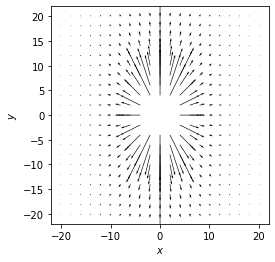

In [3]:
fig,ax = plt.subplots()
ax.set(xlabel="$x$",ylabel="$y$",aspect="equal")
ax.quiver(x[:,:,10],y[:,:,10],Ex[:,:,10],Ey[:,:,10])
# fig.savefig("./ex1/a.pdf",bbox_inches="tight")
plt.show()

### b) Bz(y)

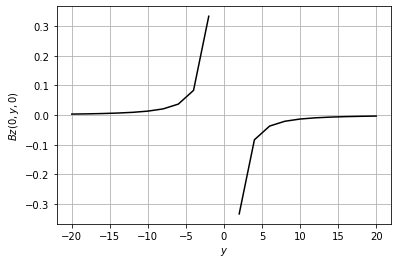

In [5]:
fig,ax = plt.subplots()
ax.set(xlabel="$y$", ylabel="$Bz(0,y,0)$")
ax.grid(True)
ax.plot(y[10,:,10],Bz[10,:,10],c="k")
fig.savefig("./ex1/b.pdf",bbox_inches="tight")
plt.show()

### c) Campo elétrico na carga parada

In [ ]:
# Plot estacionário:
r_xyz=np.sqrt(x**2+y**2+z**2)
Ex_t=x/r_xyz**3
Ey_t=y/r_xyz**3
Ez_t=z/r_xyz**3

Ex_t[9:12,9:12,10]=None
Ey_t[9:12,9:12,10]=None
Ez_t[9:12,9:12,10]=None

In [ ]:
fig,ax = plt.subplots()
ax.set(xlabel="$x$",ylabel="$y$",aspect="equal")
ax.quiver(x[:,:,10],y[:,:,10],Ex_t[:,:,10],Ey_t[:,:,10])
# fig.savefig("./ex1/c.pdf",bbox_inches="tight")
plt.show()

# Exercício 2

In [6]:
# Todas as matrizes têm tamanho de 21 pontos
reshaped_E=[]
path_E="/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex2/out/E_field.dat"
reshaped_B=[]
path_B="/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex2/out/B_field.dat"
for column in np.loadtxt(path_E,skiprows=1).T:
    reshaped_E.append(np.reshape(column, (21,21,21)))
for column in np.loadtxt(path_B,skiprows=1).T:
    reshaped_B.append(np.reshape(column, (21,21,21)))
    
x,y,z,Ex,Ey,Ez=reshaped_E
x,y,z,Bx,By,Bz=reshaped_B

# É conveniente anular os campos elétricos próximos ao centro. O índice central é o médio de 21 pontos. Em Py,
# corresponde ao índice 10.
Ex[9:12,9:12,10]=None
Ey[9:12,9:12,10]=None
Ez[9:12,9:12,10]=None

### a) E(r,t)

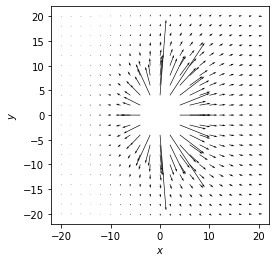

In [7]:
fig,ax = plt.subplots()
ax.set(xlabel="$x$",ylabel="$y$",aspect="equal")
ax.quiver(x[:,:,10],y[:,:,10],Ex[:,:,10],Ey[:,:,10])
# fig.savefig("./ex2/a.pdf",bbox_inches="tight")
plt.show()

### b) Bz(y)

In [9]:
Bz[10,10,10] = None

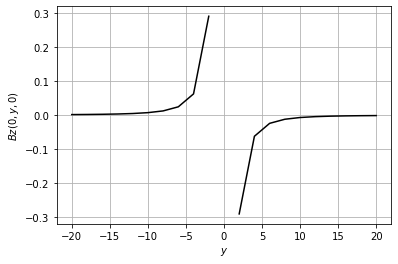

In [10]:
fig,ax = plt.subplots()
ax.set(xlabel="$y$", ylabel="$Bz(0,y,0)$")
ax.grid(True)
ax.plot(y[10,:,10],Bz[10,:,10],c="k")
# fig.savefig("./ex2/b.pdf",bbox_inches="tight")
plt.show()

# Exercício 3

**Recursos utilizados:**
+ [Scipy, curve fitting]()
+ [Matplotlib, specify order of layers](https://stackoverflow.com/questions/37246941/specifying-the-order-of-matplotlib-layers)
    + `zorder`
+ [Matplotlib: put newline in label](https://stackoverflow.com/questions/2660319/putting-newline-in-matplotlib-label-with-tex-in-python)

### a) $\langle |\mathbf{E}|^2 \rangle$

In [20]:
path_E=r"/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex3/out/E_avg.dat"
data_E=np.loadtxt(path_E,skiprows=1).T

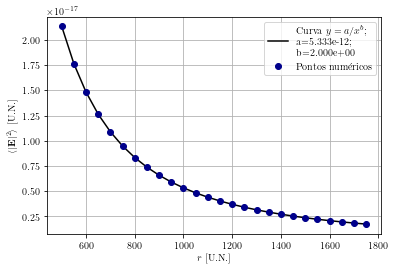

In [21]:

r,norm_E = data_E
def fit_E(r,a,b):
    return a/r**b
popt, pcov = curve_fit(fit_E, r, norm_E)

fig,ax = plt.subplots()
ax.set(xlabel=r"$r$ [U.N.]", ylabel=r"$\langle|\mathbf{E}|^2\rangle$ [U.N.]")
ax.plot(r, fit_E(r, *popt), color="black",zorder=3,label=(r"Curva $y=a/x^b$;"+"\n"+"a={:.3e};\nb={:.3e}".format(*popt)))
ax.scatter(r, norm_E,zorder=5,color="darkblue",label="Pontos numéricos")
ax.grid(True)
ax.legend()
# fig.savefig("./ex3/a.pdf",bbox_inches="tight")

### b) $\langle |\mathbf{S}| \rangle$

In [9]:
path_S=r"/home/vinicius/Vinicius/USP/2021 (02)/EMC/Projeto 4/prog/ex3/out/S_avg.dat"
data_S=np.loadtxt(path_S,skiprows=1).T

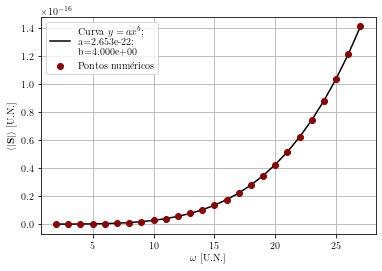

In [22]:
omega, norm_S = data_S
def fit_S(omega, a,b):
    return a*omega**b
popt, pcov = curve_fit(fit_S, omega, norm_S)

# plt.plot(omega, func(omega, *popt),color="black",zorder=0)
# plt.scatter(omega, norm_S,color="darkred",marker="o",zorder=5)
# plt.show()

fig,ax = plt.subplots()
ax.set(xlabel=r"$\omega$ [U.N.]", ylabel=r"$\langle |\mathbf{S}| \rangle$ [U.N.]")
ax.plot(omega, fit_S(omega, *popt), color="black",zorder=3,label=(r"Curva $y=ax^b$;"+"\n"+"a={:.3e};\nb={:.3e}".format(*popt)))
ax.scatter(omega, norm_S,zorder=5,color="darkred",label="Pontos numéricos")
ax.grid(True)
ax.legend()
fig.savefig("./ex3/b.pdf",bbox_inches="tight")

In [57]:
popt

array([2.65258211e-22, 4.00000003e+00])

In [16]:
popt

array([2.65258237e-22, 4.00000000e+00])

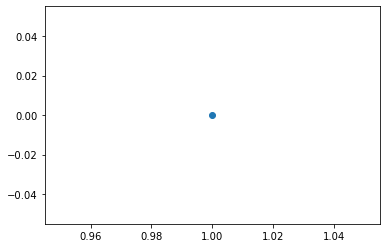

In [27]:
plt.scatter([None,1],[None,0])